In [1]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pickle
from scipy import optimize
from contextlib import contextmanager
from itertools import product
#import recordlinkage
import json

import pickle

import urllib
import re


In [2]:
words=["hello","world"]

for word in words:
    print(word)

hello
world


In [3]:
for letter in "hello world":
    print(letter)

h
e
l
l
o
 
w
o
r
l
d


In [4]:
for i in range(10):
    print (i)

0
1
2
3
4
5
6
7
8
9


In [5]:
word="around the world in 80 days"
it=iter(word)
#for i in np.arange(0,len(word)):
#    print(next(it))
    
print(*it)    



a r o u n d   t h e   w o r l d   i n   8 0   d a y s


In [6]:
dict={'firstName':'david','lastName':'nishimoto'}

for key,value in dict.items():
    print(key,value)

firstName david
lastName nishimoto


In [7]:
avengers =['hawkeye','iron man','thor','quicksilver']

e=enumerate(avengers)
print(type(e))

#e_list=list(e)
#print(e_list)

for index,value in enumerate(avengers):
    print(index,value)
    
for index,value in enumerate(avengers, start=10):
    print(index,value)   

<class 'enumerate'>
0 hawkeye
1 iron man
2 thor
3 quicksilver
10 hawkeye
11 iron man
12 thor
13 quicksilver


In [8]:
avengers =['hawkeye','iron man','thor','quicksilver']
names=['barton','stark','odinson','maximoff']

z=zip(avengers,names)
print(type(z))

z_list=list(z)

print(z_list)

for z1,z2 in z_list:
    print(z1,z2)

print(*z)



<class 'zip'>
[('hawkeye', 'barton'), ('iron man', 'stark'), ('thor', 'odinson'), ('quicksilver', 'maximoff')]
hawkeye barton
iron man stark
thor odinson
quicksilver maximoff



In [9]:
h_letters = [ letter for letter in 'human' ]
print( h_letters)

['h', 'u', 'm', 'a', 'n']


In [10]:
words=['hello','world']

result=[word for word in words]
print(result)

['hello', 'world']


In [11]:
letters = list(map(lambda x: x, 'human'))
print(letters)

['h', 'u', 'm', 'a', 'n']


In [12]:
df = pd.DataFrame({'Keyword': {0: 'apply', 1: 'apply', 2: 'apply', 3: 'terms', 4: 'terms'},
 'X': {0: [1, 2], 1: [1, 2], 2: 'xy', 3: 'xx', 4: 'yy'},
 'Y': {0: 'yy', 1: 'yy', 2: 'yx', 3: 'ix', 4: 'xi'}})
#print(df)
#print(df.info())

df2=df.copy()
mylist=df2.iloc[0,1]
df2.iloc[0,1]=' '.join(map(str,mylist))

mylist=df2.iloc[1,1]
df2.iloc[1,1]=' '.join(map(str,mylist))

duplicates=df2.duplicated(keep=False)
#print(df2[duplicates])

df2[duplicates].drop_duplicates(inplace=True)
#print(df2)
#print(df.astype(str))

print(df.astype(str).duplicated(keep=False))

df=df.iloc[df.astype(str).drop_duplicates().index]
#print(df)



0     True
1     True
2    False
3    False
4    False
dtype: bool


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
keys = ['name', 'age', 'food']
values = ['Monty', 42, 'spam']
index=np.arange(0,len(keys)-1)

df=pd.DataFrame(list(zip(keys,values)), columns=['keys','values'])
df.set_index('keys')
print(df.head())

data_dict = df.iloc[index].set_index('keys')['values'].to_dict() 
print(data_dict)

   keys values
0  name  Monty
1   age     42
2  food   spam
{'name': 'Monty', 'age': 42}


In [14]:
tshirts=[

{'brand': 'A',
'color': ['blue', 'white', 'black'],
'size': ['XS', 'M', 'L']},

{'brand': 'B',
'color': ['blue', 'red', 'black'],
'size': ['S', 'M', 'L']},

{'brand': 'C',
'color': ['blue', 'white', 'yellow'],
'size': ['S', 'M', 'XL']}

]

In [15]:
def search(color):
    for item in tshirts:
        #print(item['color'])
        if color in item['color']:
            yield item
        
for item in search("blue"):
    print(item)

{'brand': 'A', 'color': ['blue', 'white', 'black'], 'size': ['XS', 'M', 'L']}
{'brand': 'B', 'color': ['blue', 'red', 'black'], 'size': ['S', 'M', 'L']}
{'brand': 'C', 'color': ['blue', 'white', 'yellow'], 'size': ['S', 'M', 'XL']}


      column1     column2
0  2017-01-01  2017-01-01
1  2017-01-01  2017-01-11
2  2017-01-02  2017-03-09
3  2017-01-03  2017-03-16
4  2017-01-04  2017-01-10
      column1     column2  differences classification
0  2017-01-01  2017-01-01            0        level 0
1  2017-01-01  2017-01-11           10        level 3
2  2017-01-02  2017-03-09           66        level 4
3  2017-01-03  2017-03-16           72        level 5
4  2017-01-04  2017-01-10            6        level 2


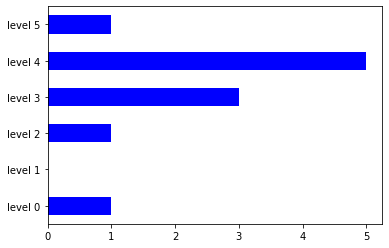

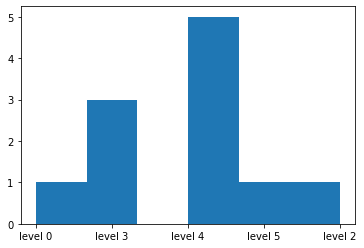

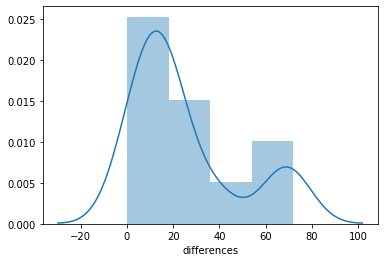

In [16]:
column1=['2017-01-01','2017-01-01','2017-01-02','2017-01-03','2017-01-04','2017-01-05','2017-01-06','2017-01-07','2017-01-08','2017-01-09','2017-01-10']        
column2=['2017-01-01','2017-01-11','2017-03-09','2017-03-16','2017-01-10','2017-01-25','2017-01-25','2017-01-26','2017-01-15','2017-02-16','2017-01-24' ]
index=range(0,len(column1))
data={'column1':column1,'column2':column2}
df=pd.DataFrame(data, columns=['column1','column2'],index=index)
print(df.head())

differences=df.apply(lambda x: datetime.strptime(x['column2'],'%Y-%m-%d')-datetime.strptime(x['column1'],'%Y-%m-%d'),axis=1)
differences=differences.dt.days.astype('int')
#print(differences)
#years_bins = pd.IntervalIndex.from_tuples([(-1, 0),(0, 2),(2,6),(6, 15),(15,69),(69,np.inf)])
years_bins=[-1,0,2,6,15,69,np.inf]
output_labels=['level 0','level 1','level 2','level 3','level 4','level 5']    

out=pd.cut(differences,bins=years_bins,labels=output_labels)
df['differences']=differences
df['classification']=out

print(df.head())

fig, ax = plt.subplots()
ax = out.value_counts(sort=False).plot.barh(rot=0, color="b", figsize=(6,4))
ax.set_yticklabels(output_labels)
#ax.ylabel('Years of Coding Experience')
plt.show()

plt.hist(df['classification'], bins=6)
plt.show()

sns.distplot(df['differences'])
plt.show()


In [17]:
fuzz.WRatio('Reeding','Reading')

86

In [18]:
string="Houston Rockets vs Los Angeles Lakers"

choices=pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',
'Houston vs Los Angeles','Heat vs Bulls'])

process.extract(string, choices, limit=2)


[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]

In [19]:
categories={"0":"California","1":"New York"}

df=pd.DataFrame(list(categories.items()),columns=["column1","state"])
print(df.head())

for state in df['state']:
    print(state)



  column1       state
0       0  California
1       1    New York
California
New York


In [20]:
data = {'state': ['Rome', 'Venice', 'NY', 'Boston', 'London', 'Bristol'],
    'year': [2000, 2001, 2002, 2001, 2003, 2003],
    'number': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

mapping = {
    'Rome':'it', 
    'Venice':'it',
    'London':'UK',
    'Bristol':'UK',
    'NY':'US',
    'Boston':'US'
}

df = pd.DataFrame(data)
df['continent']=df['state'].replace(mapping)
print(df.head())
print(df.groupby(['continent','year'])['number'].mean())

    state  year  number continent
0    Rome  2000     1.5        it
1  Venice  2001     1.7        it
2      NY  2002     3.6        US
3  Boston  2001     2.4        US
4  London  2003     2.9        UK
continent  year
UK         2003    3.05
US         2001    2.40
           2002    3.60
it         2000    1.50
           2001    1.70
Name: number, dtype: float64


In [21]:
result=map(lambda item: chr(item), [66, 53, 0, 94])
print(*result)


B 5   ^


In [22]:
from functools import reduce

def f(x):
        return x % 2 != 0 and x % 3 != 0
    
print(*filter(f, range(2, 25)))
#[5, 7, 11, 13, 17, 19, 23]

def cube(x):
        return x**3
print(*map(cube, range(1, 11)))
#[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

def add(x,y):
        return x+y

reduce(add, range(1, 11))
#55

5 7 11 13 17 19 23
1 8 27 64 125 216 343 512 729 1000


55

In [23]:
list1=['600809','600141','600329','1','2','3']

df=pd.DataFrame({'STK_ID':list1})
print(df.head())

stk_list = ['600809','600141','600329']

result=filter(lambda item: item in stk_list,df['STK_ID'])

print(list(result))



   STK_ID
0  600809
1  600141
2  600329
3       1
4       2
['600809', '600141', '600329']


In [24]:
from collections import OrderedDict
dayname=['Friday','Monday','Saturday']
A=[136,305,0]
B=[239,431,3]
C=[0,0,0]
D=[0,0,0]
E=[283,845,11]
df=pd.DataFrame({'dayname':dayname,'A':A,'B':B,'C':C,'D':D})
df.set_index('dayname')
new_df=df.T
#print(new_df)
#l for list
result2=new_df.to_dict('l', into=OrderedDict)
#print(result)

result=df.set_index('dayname').T.to_dict('l')

for key,value in result.items():
    print (key)
    [print(item) for item in value]


print(result2)
for item in result2:
    print(item)

Friday
136
239
0
0
Monday
305
431
0
0
Saturday
0
3
0
0
OrderedDict([(0, ['Friday', 136, 239, 0, 0]), (1, ['Monday', 305, 431, 0, 0]), (2, ['Saturday', 0, 3, 0, 0])])
0
1
2


C:\Users\dnishimoto.BOISE\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [25]:

myList = ['abcdde',
          'baccd',
          'eeabg']

#You can divide the list into sets and find the intersection using that:
sets_list = [{letter for letter in string} for string in myList]
print(sets_list)
print(set.intersection(*sets_list))

[{'c', 'd', 'e', 'a', 'b'}, {'c', 'a', 'd', 'b'}, {'e', 'a', 'g', 'b'}]
{'a', 'b'}


In [26]:
col1=[1,1,0,1,1,1]     
col2=[1,0,1,1,0,0]     
col3=['A','A','A','A','B','C']
df=pd.DataFrame({'col1':col1,'col2':col2,'col3':col3})
results=df[['col1','col2','col3']].value_counts().sort_values(ascending=False)
print(results.index[0],results.iloc[0])
#print(results)
#print(results.unstack(level=2))


(1, 1, 'A') 2


In [27]:
def median(values):
    """Get the median of a list of values
      Args:
        values (iterable of float): A list of numbers
      Returns:
        float
    """
    # Write the median() function
    values.sort()
    n = len(values)
    
    if n%2==0:
        median1 = values[n//2] 
        median2 = values[n//2 - 1] 
        median = (median1 + median2)/2
    else:
        median = values[n//2] 
    return median

print(median([1,2,4,3,5,7]))

3.5


In [28]:
@contextmanager
def my_context():
    print('hello')
    yield 42
    print('goodbye')
    
with my_context() as v1:
    print(v1)

hello
42
goodbye


In [46]:
def double_args(func):
    def wrapper(a,b):
        return func(a*2,b*2)
    return wrapper

@double_args
def multiple(a,b):
        return a*b

new_multiple=multiple(5,7)
print(new_multiple)

140


In [47]:
class Day1:

    def day1(self):
        print('1. Band name Generator\n')

    def program1(self):
        print('Welcome to Band Name Generator.\n')
        cityName=input('What\'s is the name of city you grew up?\n')
        petName = input('What\'s your pet\'s name?\n')
        print('Your Band Name could be : '+cityName+" "+petName)

class TipCalculator:
    def day2(self):
        print("2. Tip Calculator For  Bill.\n")

    def program1(self):
        print('Welcome to tip calculator.\n')
        
def choose():
    print("Choose From the following Program:\n")
    day1 = Day1()
    day1.day1()

    day2 = TipCalculator()
    day2.day2()


    x = int(input());


    chooices={
        1: day1.program1(),
        2: day2.program1(),

    }
    chooices.get(x, "Ther is no program")    

choose()

Choose From the following Program:

1. Band name Generator

2. Tip Calculator For  Bill.

2
Welcome to Band Name Generator.

What's is the name of city you grew up?
a
What's your pet's name?
a
Your Band Name could be : a a
Welcome to tip calculator.



In [11]:
class AstroBody:
    description = 'Natural entity in the observable universe.'    

class Star:
    description=AstroBody.description
    pass

sun = Star()


print(sun.description)

Natural entity in the observable universe.


In [13]:
class Candy:
    flavor = 'sweet'
    
    def __init__(self, name):
        self.name = name
        
c = Candy('Chocolate')

print(c.name)

Chocolate


In [16]:
[i  for i in range(5)]

[0, 1, 2, 3, 4]

In [21]:
class Planet:
    def __init__(self, name):
        self.name = name
        
v = ('venus')

In [33]:
w = 'python'

w_iterator = iter(w)

print(next(w_iterator))

#for l in (w_iterator):
    #print(l)
    


p


In [34]:
ints = set([1,1,2,3,3,3,4])
print(len(ints))

4


In [35]:
from datetime import date

d1=date(2017,11,5)
d2=date(2017,12,4)

delta= d2 - d1

print(delta.days)

29


In [53]:
import datetime
#https://strftime.org/
d=datetime.datetime.now()
print(d.strftime("%Y/%m/%d"))
print(d.strftime("%H:%m %p"))
match=d.strftime("%H:%m %p")=="14:00 PM"
print(match)

2020/11/08
16:11 PM
False


In [73]:
import datetime
#https://strftime.org/
d=datetime.datetime.now()

dateList=['2017-12-31','2001-01-01','2010-11-21']

for item in dateList:
    diff_days=(d-datetime.datetime.strptime(item,'%Y-%m-%d')).days
    if (diff_days/365)>5:
        print(item," found")

2001-01-01  found
2010-11-21  found


In [20]:
from datetime import datetime, timedelta, timezone

print("Eastern Standard Time Zone")
ET=timezone(timedelta(hours=-5))
#print(ET)
#print(datetime(1970,1,1, tzinfo=timezone.utc))

tzinfo=timezone.utc
dt=datetime(2017,12,30,15,9,3)
#dt=datetime(2017,12,30,15,9,3,tzinfo=ET)
#print (dt)
print(dt.astimezone(ET))

print("India Standard Time Zone")

IST= timezone(timedelta(hours=5,minutes=30))
dt=datetime(2017,12,30,15,9,3)
print(dt.astimezone(IST))
print(dt.replace(tzinfo=timezone.utc))

Eastern Standard Time Zone
2017-12-30 17:09:03-05:00
India Standard Time Zone
2017-12-31 03:39:03+05:30
2017-12-30 15:09:03+00:00


In [23]:
edt = timezone(timedelta(hours=-4))
dt=datetime(2017,12,30,15,9,3)
print(dt)
dt=dt.replace(tzinfo=edt)

print(dt)

2017-12-30 15:09:03
2017-12-30 15:09:03-04:00


In [32]:
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

spring_ahead_159am = datetime(2017,3,12,1,59,59, tzinfo=EST)
print(spring_ahead_159am.isoformat())

spring_ahead_3am=datetime(2017,3,12,3,0,0,tzinfo=EDT)
spring_ahead_3am.isoformat()

print(((spring_ahead_3am - spring_ahead_159am).total_seconds()-1)/60)

2017-03-12T01:59:59-05:00
0.0


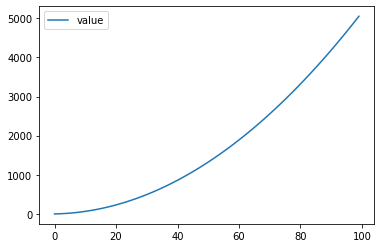

In [29]:
def accumulate(values):
    """The accumulate function takes the offset previous numbers in a series and sums them."""
    offset=0
    accumulate=[]
    for i in np.arange(len(values)):
        offset+=1
        accumulate.append(values[:offset].sum())
        
    return accumulate

A=pd.DataFrame(np.arange(1,101), columns=['value'])

#print(A)

A.aggregate(accumulate).plot()

In [1]:
l = [[1, 2, 3], [4, 5, 6], [7], [8, 9]]
l2=[]
[[l2.append(i) for i in sublist] for sublist in l]
print(l2)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [19]:
string = "abc123"
char = "def2346789"

def fncCombinations(a):
    combination_list=[]
    for j in range(len(string)): 
        combination_list.append(string[:j] + a + string[j+1:])
    return combination_list 
combination_list=[fncCombinations(a) for a in char]
print(combination_list)

#for i in range(len(char)):
#    current=char[i]
#    for j in range(len(string)):
#        front=string[:j]
#        back=string[j+1:]
#        print("f:{}b:{}c:{}".format(front,back,current))
#        combination_list=[x for x in product(current,back)]
#        print(combination_list)
        
    
    
    

[['dbc123', 'adc123', 'abd123', 'abcd23', 'abc1d3', 'abc12d'], ['ebc123', 'aec123', 'abe123', 'abce23', 'abc1e3', 'abc12e'], ['fbc123', 'afc123', 'abf123', 'abcf23', 'abc1f3', 'abc12f'], ['2bc123', 'a2c123', 'ab2123', 'abc223', 'abc123', 'abc122'], ['3bc123', 'a3c123', 'ab3123', 'abc323', 'abc133', 'abc123'], ['4bc123', 'a4c123', 'ab4123', 'abc423', 'abc143', 'abc124'], ['6bc123', 'a6c123', 'ab6123', 'abc623', 'abc163', 'abc126'], ['7bc123', 'a7c123', 'ab7123', 'abc723', 'abc173', 'abc127'], ['8bc123', 'a8c123', 'ab8123', 'abc823', 'abc183', 'abc128'], ['9bc123', 'a9c123', 'ab9123', 'abc923', 'abc193', 'abc129']]


In [42]:
string="abc123"
char = "def2346789"
queue=[]
stack=[]
combination_list=[]
queue=[x for x in string]
#print(queue)
for index in range(len(queue)):
    stack.append(queue.pop(0))
    front="".join(stack[:-1])
    back="".join(queue)
    print(front,back)
    combination_list.append([front+a+back for a in char])

print(combination_list)


 bc123
a c123
ab 123
abc 23
abc1 3
abc12 
[['dbc123', 'ebc123', 'fbc123', '2bc123', '3bc123', '4bc123', '6bc123', '7bc123', '8bc123', '9bc123'], ['adc123', 'aec123', 'afc123', 'a2c123', 'a3c123', 'a4c123', 'a6c123', 'a7c123', 'a8c123', 'a9c123'], ['abd123', 'abe123', 'abf123', 'ab2123', 'ab3123', 'ab4123', 'ab6123', 'ab7123', 'ab8123', 'ab9123'], ['abcd23', 'abce23', 'abcf23', 'abc223', 'abc323', 'abc423', 'abc623', 'abc723', 'abc823', 'abc923'], ['abc1d3', 'abc1e3', 'abc1f3', 'abc123', 'abc133', 'abc143', 'abc163', 'abc173', 'abc183', 'abc193'], ['abc12d', 'abc12e', 'abc12f', 'abc122', 'abc123', 'abc124', 'abc126', 'abc127', 'abc128', 'abc129']]


In [93]:
Index=[1153,1163,1172,1183,1193]
HOME_TEAM=['Manchester United','Leicester City','Everton','Stoke City','West Bromwich Albion']
AWAY_TEAM=['Swansea City','Everton','Hull City','Everton','Sunderland']
BOOL=[True,False,True,True,False]

types = pd.Series(data=['int', 'str', 'str', 'bool'], index=['Index', 'HOME_TEAM', 'AWAY_TEAM', 'BOOL'])
types = types.apply(eval)

df=pd.DataFrame({'Index':Index,'HOME_TEAM':HOME_TEAM,'AWAY_TEAM':AWAY_TEAM,'BOOL':BOOL})
df.set_index('Index')

df = df.astype(dtype=types.to_dict())

print(df.dtypes)

list1=list(df['HOME_TEAM'].unique())
list2=list(df['AWAY_TEAM'].unique())
notInList2=set(list1)-set(list2)
combined=(list1+list(notInList2))

print(combined)

df['TEAM']=""
for item in combined:
    filter=(df['HOME_TEAM']==item) | (df['AWAY_TEAM']==item)
    key=df[filter]['Index'].index
    df.loc[key,'TEAM']=item
    
print(df.head())
    


Index         int32
HOME_TEAM    object
AWAY_TEAM    object
BOOL           bool
dtype: object
['Manchester United', 'Leicester City', 'Everton', 'Stoke City', 'West Bromwich Albion', 'Manchester United', 'Leicester City', 'West Bromwich Albion', 'Stoke City']
   Index             HOME_TEAM     AWAY_TEAM   BOOL                  TEAM
0   1153     Manchester United  Swansea City   True     Manchester United
1   1163        Leicester City       Everton  False        Leicester City
2   1172               Everton     Hull City   True               Everton
3   1183            Stoke City       Everton   True            Stoke City
4   1193  West Bromwich Albion    Sunderland  False  West Bromwich Albion


In [27]:
list1=['a','b','c','d','e']
list2=[np.empty,'a','a','b','d']
df=pd.DataFrame({'A':list1,'B':list2})

df['C']=[df.loc[df['A']==x,'B'].values if x in df['A'].values else '' for x in df['B']]
print(df[['A','B','C']].head())

   A                          B                            C
0  a  <built-in function empty>                             
1  b                          a  [<built-in function empty>]
2  c                          a  [<built-in function empty>]
3  d                          b                          [a]
4  e                          d                          [b]


In [46]:
x=round(float("10.8"),0)
print(x)

11.0


In [50]:
df = pd.DataFrame(data    = [1,np.nan,np.nan,1,1,np.nan,1,1,1], 
                   columns = ['X'], 
                   index   = ['a', 'a', 'a', 
                              'b', 'b', 'b',
                              'c', 'c', 'c'])

out = df.groupby(level=0).filter(lambda x : x.isna().sum()<=1)

print(out)

     X
b  1.0
b  1.0
b  NaN
c  1.0
c  1.0
c  1.0


In [10]:
list1=['sw0005', 'sw0076', 'Gi1/2', 'sw0005', 'sw0076', 'Gi1/5']

queryable=iter(list1)

mylist=[]
for i in range(int(len(list1)/3)):
    mylist.append({(next(queryable),next(queryable)):next(queryable)})
    
print(mylist)

[{('sw0005', 'sw0076'): 'Gi1/2'}, {('sw0005', 'sw0076'): 'Gi1/5'}]


In [43]:
myList = [
    '1000', 'ParameterName=Device type', 'ObjectType=0x7', 'DataType=0x7',
    'AccessType=ro', 'PDOMapping=0', 'ObjFlags=1', 'ParameterValue=0x00020192',
    '1001', 'ParameterName=Error register', 'ObjectType=0x7', 'DataType=0x5',
    'AccessType=ro', 'PDOMapping=0', 'ObjFlags=1', 'ParameterValue=0x00',
    '1003', 'SubNumber=6', 'ParameterName=Error history', 'ObjectType=0x8'
]

queryable=iter(myList)

index = [i for i, v in enumerate(myList) if v.isnumeric()]

#queryable2 = iter(index)
for indice1, indice2 in list(zip(index,index[1:]+[-1])):
    if (indice2==-1):
        indice2=len(myList)
    print(indice1,indice2)
    print(myList[indice1:indice2])

listOfList=[]
sublist=[]
for a in queryable:
    if (a.isnumeric()==True) & (len(sublist)>0):
        listOfList.append(sublist)
        sublist=[]
        sublist.append(a) 
    else:
        sublist.append(a) 
        
if(len(sublist)>0):
    listOfList.append(sublist)
#print(listOfList)

0 8
['1000', 'ParameterName=Device type', 'ObjectType=0x7', 'DataType=0x7', 'AccessType=ro', 'PDOMapping=0', 'ObjFlags=1', 'ParameterValue=0x00020192']
8 16
['1001', 'ParameterName=Error register', 'ObjectType=0x7', 'DataType=0x5', 'AccessType=ro', 'PDOMapping=0', 'ObjFlags=1', 'ParameterValue=0x00']
16 20
['1003', 'SubNumber=6', 'ParameterName=Error history', 'ObjectType=0x8']


In [5]:

columns=("id","name","age","has_children")

users={
(1,"adrian",32,False),
(2,"ruanne",28,True)
}
record=dict(zip(columns,users.pop()))
#print(users.pop())
print(record)

fixed_dict={"type":"RECORD","stream":"DC_employees"}
record_msg={**fixed_dict,"record":record}

print(json.dumps(record_msg))

{'id': 1, 'name': 'adrian', 'age': 32, 'has_children': False}
{"type": "RECORD", "stream": "DC_employees", "record": {"id": 1, "name": "adrian", "age": 32, "has_children": false}}


In [7]:
region=['Qtr1','Qtr2','Qtr3','Qtr4']
europe=[21704714,17987034,19485029,22567894]
asia=[8774099,12214447,14356879,15763492]
north_america=[12094215,10873099,15689543,17456723]

df=pd.DataFrame({'Region':region,'Europe':europe,'Asia':asia,'North America':north_america})
types = pd.Series(data=['str', 'int', 'int', 'int'], index=['Region', 'Europe', 'Asia', 'North America'])
types = types.apply(eval)
df.reset_index()
df = df.astype(dtype=types.to_dict())
df=df.T
print(df.head())

                      0         1         2         3
Region             Qtr1      Qtr2      Qtr3      Qtr4
Europe         21704714  17987034  19485029  22567894
Asia            8774099  12214447  14356879  15763492
North America  12094215  10873099  15689543  17456723


In [89]:
df = pd.DataFrame([
    [
        {'action_type': 'landing_page_view', 'value': '1'},
        {'action_type': 'link_click', 'value': '1'},
        {'action_type': 'page_engagement', 'value': '1'},
        {'action_type': 'post_engagement', 'value': '1'},
    ],
    [
        {'action_type': 'landing_page_view', 'value': '1'},
        {'action_type': 'link_click', 'value': '1'},
        {'action_type': 'page_engagement', 'value': '1'},
        {'action_type': 'post_engagement', 'value': '1'},
    ],
    [
        {'action_type': 'video_view', 'value': '23'},
        {'action_type': 'page_engagement', 'value': '23'},
        {'action_type': 'post_engagement', 'value': '23'},
    ]
   ]
)

df2=pd.DataFrame(columns=['action_type','value'])
for key,dictList in df.iterrows():
    for key, dictAction in dictList.items():  #returns tuple (index, dict)
        #print(dictAction)
        if (dictAction is None)==False:
            
            keys=dictAction.keys()
            index=len(df2)
            for key in keys:
                value=dictAction[key]
                df2.loc[index,key]=value
                #print(key,value)

df2=df2.T
print(df2.head())        
#df=pd.DataFrame({'action_type':action_type,'value':value})        
#df=df.T



                            0           1                2                3   \
action_type  landing_page_view  link_click  page_engagement  post_engagement   
value                        1           1                1                1   

                            4           5                6                7   \
action_type  landing_page_view  link_click  page_engagement  post_engagement   
value                        1           1                1                1   

                     8                9                10  
action_type  video_view  page_engagement  post_engagement  
value                23               23               23  


In [93]:
dr = pd.date_range('01-01-2020 9:00', '01-03-2020 23:59', freq='15T')
df = pd.DataFrame({'data': 1}, index=dr) 
print(df.head())

                     data
2020-01-01 09:00:00     1
2020-01-01 09:15:00     1
2020-01-01 09:30:00     1
2020-01-01 09:45:00     1
2020-01-01 10:00:00     1


90
100
89
95
93
115
96
104
101
86
103
114
115
106
98
121
107
106
107
97
   count_1  count_2  count_3  count_4  count_5  count_6  count_7  count_8  \
1        1        6        6        3        1        4        7        4   
2        6        2        9        7        1        3        3        5   
3        5        5        3        7        2        9        3        1   
4        8        4        4        1        3        5        6        8   
5        5        5        1        2        7        5        5        2   

   count_9  count_10  ...  count_12  count_13  count_14  count_15  count_16  \
1        8         1  ...         1         3         5         1         8   
2        7         7  ...         4         8         6         3         9   
3        4         2  ...         4         3         1         1         9   
4        3         5  ...         5         1         1         5         4   
5        6         4  ...         4         9         9         4     

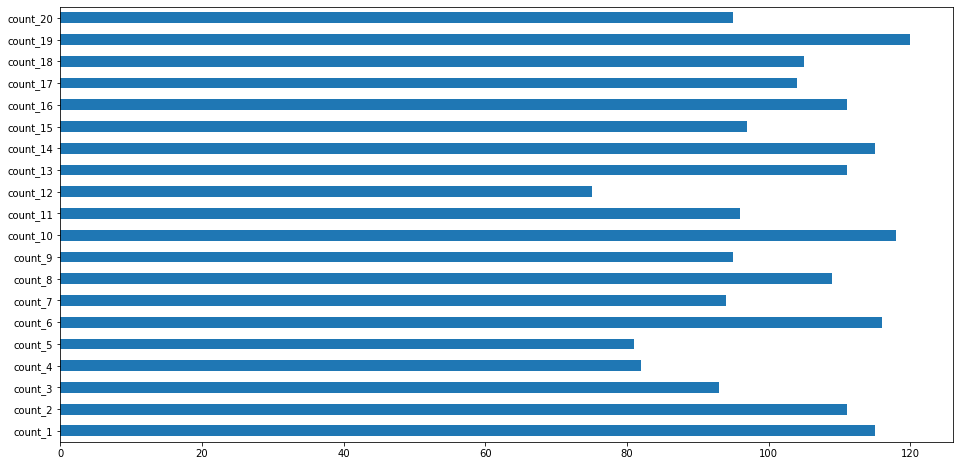

In [30]:
bin = []
cols = []
for i in range(1,21):
    cols.append("count_" + str(i))
    bin.append(i)

df = pd.DataFrame(np.random.randint(1,10,(20, 20)), index=bin, columns=cols)
for col in cols:
    df[col]=df[col].astype(int) 

#print(df.head())

fig,ax =plt.subplots(figsize=(16,8))
#for item in df[cols].sum():
#    print(item)
grouped=df[cols].sum().plot(kind='barh')

df['sum']=0
for key,item in df.iterrows():
    sum=0
    for col in cols:
        sum+=df.loc[key,col]
    print(sum)
    df.loc[key,'sum']=sum
    
print (df.head())




In [12]:
sid=[665544,665544,2121,665544,212121,123456,666666]
mission_end_date=["10/10/2020","03/03/2021","02/02/2021","05/12/2020","15/07/2021","03/06/2021","12/10/2020"]

superherod_sid=[212121,364331,678523,432432,665544,123456,555555,666666,432432]
hero=["Spiderman","Ironman","Batman","Dr. Strange","Thor","Superman","Nightwing","Loki","Wolverine"]
city=["New York","New York","Gotham","New York","Asgard","Metropolis","Gotham","Asgard","New York"]

df_mission=pd.DataFrame({'sid':sid,'mission_end_date':mission_end_date})
df_super=pd.DataFrame({'sid':superherod_sid,'hero':hero, 'city':city})

df=df_super.merge(df_mission,on="sid", how="left")
df['mission_end_date']=pd.to_datetime(df['mission_end_date'])
df['mission_end_date_quarter']=df['mission_end_date'].dt.quarter
df['mission_end_date_year']=df['mission_end_date'].dt.year
print(df.head(20))

pivot = df.pivot_table(index=['city', 'hero'], columns='mission_end_date_quarter', aggfunc='nunique').fillna(0)
print(pivot.head())

       sid         hero        city mission_end_date  \
0   212121    Spiderman    New York       2021-07-15   
1   364331      Ironman    New York              NaT   
2   678523       Batman      Gotham              NaT   
3   432432  Dr. Strange    New York              NaT   
4   665544         Thor      Asgard       2020-10-10   
5   665544         Thor      Asgard       2021-03-03   
6   665544         Thor      Asgard       2020-05-12   
7   123456     Superman  Metropolis       2021-03-06   
8   555555    Nightwing      Gotham              NaT   
9   666666         Loki      Asgard       2020-12-10   
10  432432    Wolverine    New York              NaT   

    mission_end_date_quarter  mission_end_date_year  
0                        3.0                 2021.0  
1                        NaN                    NaN  
2                        NaN                    NaN  
3                        NaN                    NaN  
4                        4.0                 2020.0  
5  

In [159]:
time=[60,420,120,336]
level_0=["id1","id2","id3","id4"]
level_1=["id2","id3","id4","id5"]

number=[0,1,2,3]
temp_level_0=["id1","id4","id4","id2"]
temp_level_1=["id2","id5","id3","id3"]
temp_length=[25,56,12,750]
temp_width=[2,3,7,2]

df1=pd.DataFrame({'time':time,'level_0':level_0,'level_1':level_1})
df2=pd.DataFrame({'level_0':temp_level_0,'level_1':temp_level_1,'length':temp_length,'temp':temp_width})

df1.reset_index()
df2.reset_index()
df1['id']=""
df2['id']=""
df1['id']=df1.apply(lambda row: row.level_1+":"+row.level_0 if row.level_0>row.level_1 else row.level_0+":"+row.level_1, axis=1 )
df2['id']=df2.apply(lambda row: row.level_1+":"+row.level_0 if row.level_0>row.level_1 else row.level_0+":"+row.level_1, axis=1 )
final=df1.merge(df2,on=['id'])

print(df1['id'])
print(final.head())

0    id1:id2
1    id2:id3
2    id3:id4
3    id4:id5
Name: id, dtype: object
   time level_0_x level_1_x       id level_0_y level_1_y  length  temp
0    60       id1       id2  id1:id2       id1       id2      25     2
1   420       id2       id3  id2:id3       id2       id3     750     2
2   120       id3       id4  id3:id4       id4       id3      12     7
3   336       id4       id5  id4:id5       id4       id5      56     3


In [176]:
import datetime
from datetime import datetime
date_str="2017-01-15T02:41:38.466Z"
a_date=pd.to_datetime(date_str)
print(a_date.strftime('%Y-%m-%d'))

2017-01-15


In [17]:
Cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4', np.nan],
    'Price': [22000,25000,27000,35000, 29000],
    'Liscence Plate': ['ABC 123', 'XYZ 789', 'CBA 321', 'ZYX 987', 'DEF 456']}

df = pd.DataFrame(Cars,columns= ['Brand', 'Price', 'Liscence Plate'])

print(df.head())

search = ['Honda', 'Toy', 'Ford Focus', 'Audi A4 2019']
pattern = '|'.join(search)

#print (pattern)
df['Match']=df['Brand'].str.extract(r'(^'+pattern+')')
print(df.head())

            Brand  Price Liscence Plate
0     Honda Civic  22000        ABC 123
1  Toyota Corolla  25000        XYZ 789
2      Ford Focus  27000        CBA 321
3         Audi A4  35000        ZYX 987
4             NaN  29000        DEF 456
            Brand  Price Liscence Plate       Match
0     Honda Civic  22000        ABC 123       Honda
1  Toyota Corolla  25000        XYZ 789         Toy
2      Ford Focus  27000        CBA 321  Ford Focus
3         Audi A4  35000        ZYX 987         NaN
4             NaN  29000        DEF 456         NaN


In [43]:
df=pd.DataFrame({"day":[2,2,2,1,1,1,3,3,3],"product_id":[165,177,182,210,211,213,222,285,308],
                 "no_of_moves":[145,18,108,6,12,54,100,3613,301]})


print(df.head())

moves = df.pivot_table(index='day', values='no_of_moves', columns=['day','product_id'], aggfunc='sum')
print(moves.T)



   day  product_id  no_of_moves
0    2         165          145
1    2         177           18
2    2         182          108
3    1         210            6
4    1         211           12
day                1      2       3
day product_id                     
1   210          6.0    NaN     NaN
    211         12.0    NaN     NaN
    213         54.0    NaN     NaN
2   165          NaN  145.0     NaN
    177          NaN   18.0     NaN
    182          NaN  108.0     NaN
3   222          NaN    NaN   100.0
    285          NaN    NaN  3613.0
    308          NaN    NaN   301.0
None


In [78]:
import io
import re

buffer = io.StringIO()
df.info(buf=buffer)
s = buffer.getvalue()
pat=re.search(r"total\s{1}[0-9]\s{1}column",s)
print(s)
phrase=pat.group(0)
value=re.findall(r'[0-9]+',phrase)[0]
print(int(value))

#https://docs.python.org/3/library/re.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          9 non-null      int64
 1   product_id   9 non-null      int64
 2   no_of_moves  9 non-null      int64
dtypes: int64(3)
memory usage: 344.0 bytes

3


In [22]:
df2 = pd.DataFrame({"a":[0,100,200],  "by":["C","B","B"]}, index=[0,1,1])
print(df2.sort_values(by='by').groupby("by").diff())

print(df2)

       a
1    NaN
1  100.0
0    NaN
     a by
0    0  C
1  100  B
1  200  B


Quartiles:
1st    10
2nd    10
3rd    10
4th    10
dtype: int64


<AxesSubplot:>

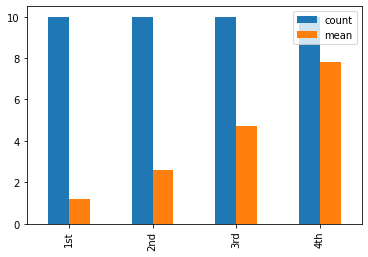

In [31]:
np.random.seed(4242)

y = pd.Series(np.random.randint(low=1, high=10, size=40))
quartiles = pd.qcut(y.rank(method = 'first'), 4, labels=['1st', '2nd', '3rd', '4th'])
#quartiles = pd.qcut(y, q=4, labels=range(1,5))  

  #four groups of equal sizes called quartiles

print('Quartiles:')
print(quartiles.value_counts(sort=False))

y.groupby(quartiles).agg(['count', 'mean']).plot(kind='bar')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

apple
apple
apple
pear
pear
pear
peach
peach
peach


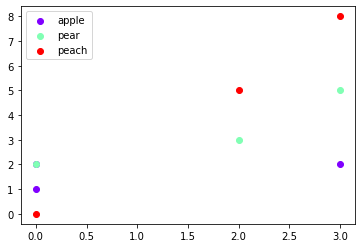

In [4]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np

dictMy = {'apple' : [[0, 1], [0, 2], [3, 2]],
          'pear' : [[2, 3], [3, 5], [0, 2]],
          'peach' : [[2, 5], [3, 8], [0, 0]],
         }
color=iter(cm.rainbow(np.linspace(0,1,len(dictMy))))

for key, c in zip(dictMy, color):
    for idx, item in enumerate(dictMy[key]):
        print(key)
        x = item[0]
        y = item[1]
        if idx == 0:
            plt.scatter(x, y, c=c, label=key)
        else:
            plt.scatter(x, y, c=c)

plt.legend()
plt.show()

In [27]:
mp = [1,2,3,4]
tw = [4,7,3,5]

cw = []
df = pd.DataFrame((cw),
    columns = ["1","2","3","4"])
df.loc[len(df)] = tw
df.reset_index()
print(df.head())

for key in range(9):
    row = df.loc[key].values #convert to array
    row = row.tolist() #convert to nested list
    row=[x+1 for x in row]
    df.loc[key+1]=row
    print (row)

   1  2  3  4
0  4  7  3  5
[5, 8, 4, 6]
[6, 9, 5, 7]
[7, 10, 6, 8]
[8, 11, 7, 9]
[9, 12, 8, 10]
[10, 13, 9, 11]
[11, 14, 10, 12]
[12, 15, 11, 13]
[13, 16, 12, 14]


     enddate  favorable  unfavorable  other
0 2012-10-25       0.48         0.49   0.03
1 2012-10-25       0.51         0.48   0.02
2 2012-10-27       0.51         0.47   0.02
3 2012-10-26       0.56         0.40   0.04
4 2012-10-28       0.48         0.49   0.04
Index(['enddate', 'favorable', 'unfavorable', 'other'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   enddate      20 non-null     datetime64[ns]
 1   favorable    20 non-null     float64       
 2   unfavorable  20 non-null     float64       
 3   other        20 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 768.0 bytes
None


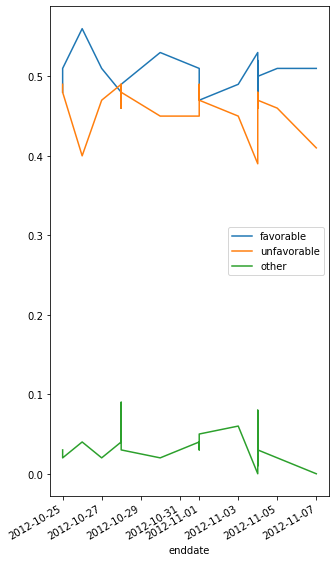

In [78]:

df=pd.read_csv('poll.csv',parse_dates=['enddate'],dtype={'favorable':np.float,'unfavorable':np.float,'other':np.float})
#df['enddate']=pd.to_datetime(df['enddate'])
df.set_index('enddate')
df=df.fillna(0)
print(df.head())
print(df.columns)
print(df.info())
fig, axs = plt.subplots(figsize=(5,10))
df.plot(x='enddate', ax=axs)
plt.show()


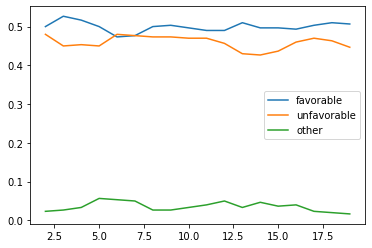

The larger the window coefficient the smoother the line will appear
The min_periods is the minimum number of observations in the window required to have a value


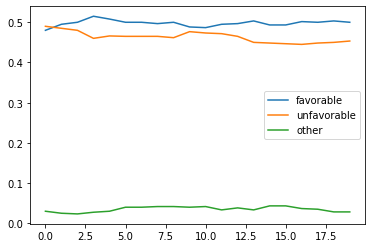

In [101]:
df.rolling(window=3,min_periods=3).mean().plot()
plt.show()
print("The larger the window coefficient the smoother the line will appear")
print('The min_periods is the minimum number of observations in the window required to have a value')

df.rolling(window=6,min_periods=3).mean().plot()
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(close=None, block=None)>

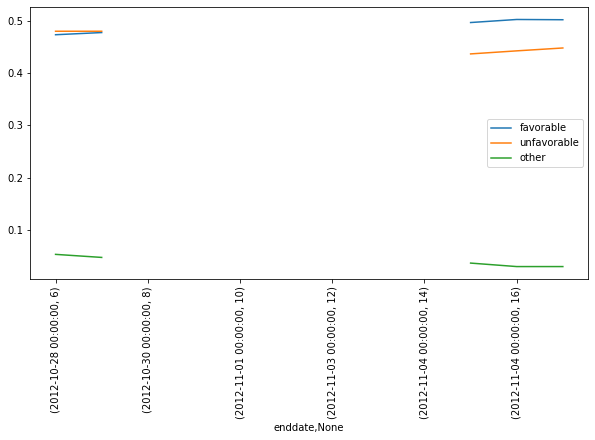

In [95]:
grouped=df.groupby('enddate')['favorable','unfavorable','other']
rolling=grouped.rolling(window=10,min_periods=3).mean()
rolling.plot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show

In [126]:
sampleDict = {
    "a" : ["123","456"],
    "b" : ["789","272"]
}

search=['789','456','100']

#https://www.techbeamers.com/program-python-list-contains-elements/
#https://stackoverflow.com/questions/10274774/python-elegant-and-efficient-ways-to-mask-a-list

for key,item in sampleDict.items():
    print(item)
    mask=[]
    [mask.append(x in search) for x in item]
    arr=np.array(item)
    print(arr[mask])
    
    #x in search
    

['123', '456']
['456']
['789', '272']
['789']


In [3]:
urllib.request.urlretrieve ("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/list%20iterators%20and%20generators.ipynb", "test.ipynb")

('test.ipynb', <http.client.HTTPMessage at 0x14b866d8708>)

In [12]:
lstr = ['hello', '', ' ', 'world', ' ']
r=re.compile('^[A-Za-z0-9]+')
results=list(filter(r.match,lstr))
print(results)

['hello', 'world']


In [15]:
lstr=[1, 2, 3]
lstr=map(str,lstr)
r=re.compile('^(3){1}')
results=list(filter(r.match,lstr))
print(results)

['3']


In [62]:
state=['A','B','C','A','A','B','A','A','C','C']     
myclass=[0,1,1,0,1,1,0,1,1,0]
df=pd.DataFrame({'state':state,'class':myclass})
groupedCount=df.groupby('state').count().values
print(grouped)
groupedSum=df.groupby(['state']).sum().values
print(grouped)
for key,row in df.iterrows():
    a_class=row['class']
    a_state=row['state']
    stateCount=groupedCount[a_class][0]
    zeroSum=groupedCount[a_class][0]-groupedSum[a_class][0]
    oneSum=groupedSum[a_class][0]
    if a_class==0:
        df.loc[key,'State_'+str(a_class)]=str(zeroSum)+'/'+str(stateCount)
        df.loc[key,'State_1']=str(stateCount-zeroSum)+'/'+str(stateCount)
    else:
        df.loc[key,'State_'+str(a_class)]=str(oneSum)+'/'+str(stateCount)
        df.loc[key,'State_0']=str(stateCount-oneSum)+'/'+str(stateCount)
    print(a_class,a_state,groupedSum[a_class][0],groupedCount[a_class][0])

print(df.head)    

#df1 = df.join(pd.crosstab(df['state'], df['class'], normalize=0).add_prefix('State_'), 
#              on='state')
#print(df1)

state
A    2
B    2
C    2
Name: class, dtype: int64
state
A    2
B    2
C    2
Name: class, dtype: int64
0 A 2 5
1 B 2 2
1 C 2 2
0 A 2 5
1 A 2 2
1 B 2 2
0 A 2 5
1 A 2 2
1 C 2 2
0 C 2 5
<bound method NDFrame.head of   state  class State_0 State_1
0     A      0     3/5     2/5
1     B      1     0/2     2/2
2     C      1     0/2     2/2
3     A      0     3/5     2/5
4     A      1     0/2     2/2
5     B      1     0/2     2/2
6     A      0     3/5     2/5
7     A      1     0/2     2/2
8     C      1     0/2     2/2
9     C      0     3/5     2/5>


In [104]:
df=pd.read_csv('ranges.csv',dtype={'range':'string','number':'string','value':np.int32})
print(df.columns)
#df['min'],df['max'],*rest=df['range'].str.split('-')

key=0
for x,y in df['range'].str.split('-'):
        df.loc[key,'min']=x
        df.loc[key,'max']=y
        key+=1

print(df.groupby(['number','min','max'])['value'].sum())

df_final = df.groupby('number').agg({
            'min': 'min', 
            'max': 'max',
            'value': 'sum'
            })

print(df_final)



Index(['range', 'number', 'value'], dtype='object')
number  min   max 
1301    3600  3700     5
        3700  3800     6
        3800  3900     3
        3900  4000     5
1302    3600  3700    10
        3700  3800    12
        3800  3900     4
        3900  4000     6
Name: value, dtype: int32
         min   max  value
number                   
1301    3600  4000     19
1302    3600  4000     32


In [148]:
import pandas as pd
import numpy as np

def unique(list1): 
    if '-' in list1:
        list1.remove('-')
    x = np.array(list1) 
    return (np.unique(x))

df = pd.DataFrame({"Col1": ['A', np.nan, 'B', 'B', 'C'],
                  "Col2": ['A', 'B', 'B', 'A', 'C'],
                  "Col3": ['A', 'B', 'C', 'A', 'C']}).fillna('-')

s="-"
for key,row in df.iterrows():
    df.loc[key,'combos']=s.join(unique([row.Col1,row.Col2,row.Col3])) 

print(df.head())

  Col1 Col2 Col3 combos
0    A    A    A      A
1    -    B    B      B
2    B    B    C    B-C
3    B    A    A    A-B
4    C    C    C      C


In [180]:
df = pd.DataFrame(np.random.randint(1,100,(100)),columns=["column1"])

results=np.array(df.sort_values(by="column1",ascending=False)).flatten()

print(results[:5])



[99 99 99 99 98]
    column1
43       99
79       99
76       99
12       99
49       98
..      ...
72        4
88        1
30        1
56        1
18        1

[100 rows x 1 columns]


       weekly  ARGENT    AUSTRAL   CANADA    CHINA     EUROPEAN  FRANCE    \
39 2018-10-01       0.0       0.0    1479.0     117.0     235.0       0.0   
50 2018-12-17       0.0       0.0    1148.0     104.0      81.0       0.0   
27 2018-07-09       0.0       0.0    1310.0      48.0     177.0       0.0   
29 2018-07-23       0.0       0.0    1168.0     271.0       5.0       0.0   
23 2018-06-11       0.0       0.0    1223.0      34.0     259.0       0.0   

    GERMANY   HG KONG   INDIA     ...  MEXICO    N ZEAL    RUSSIA    SPAIN     \
39      87.0    2356.0       0.0  ...    2243.0       0.0       0.0       0.0   
50      11.0    1962.0       0.0  ...    2083.0       0.0       0.0       0.0   
27      14.0    1180.0       0.0  ...    2047.0       0.0       0.0       0.0   
29       0.0    1219.0       0.0  ...    1822.0       0.0       0.0       0.0   
23      26.0    1237.0       0.0  ...    1922.0       0.0       0.0       0.0   

    TAIWAN    THAILND   U KING    year  week    to

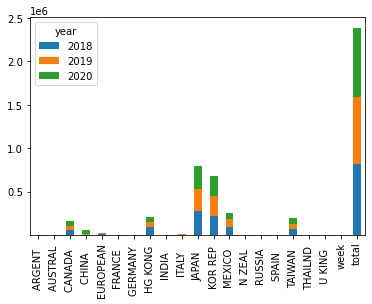

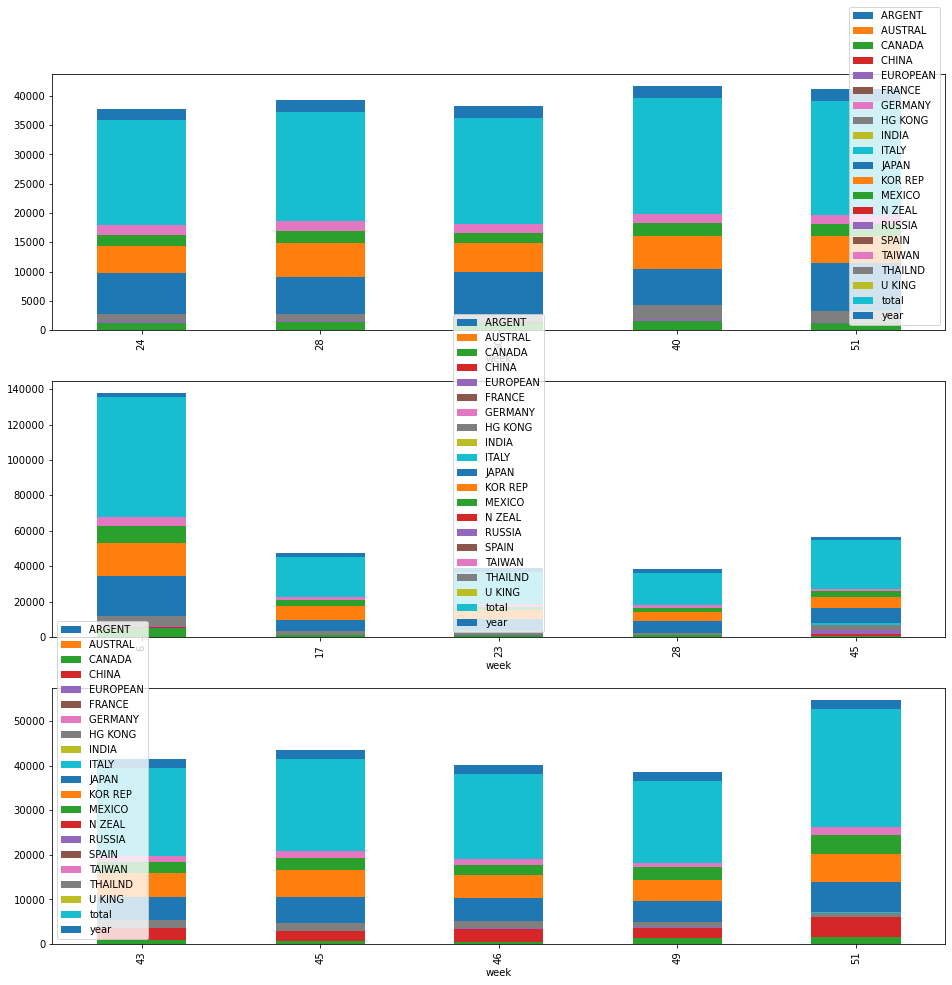

In [317]:
#url = 'https://gist.githubusercontent.com/adamFlyn/a6048e547b5a963c7af356c964d15af6/raw/c57c7915cf14f81edc9d5eadaf14efbd43d3e58a/trade_df.csv'
#df = pd.read_csv(url, parse_dates=['weekly'])
#df.to_csv('trade_df.csv')
df=pd.read_csv('trade_df.csv',parse_dates=['weekly'])
df['weekly']=pd.to_datetime(df['weekly'])
df['year'] = df['weekly'].dt.year
df['week'] = df['weekly'].dt.strftime('%W').astype('int')
df['total']=0
df=df.drop('Unnamed: 0',axis=1)
df.reset_index()
for key,row in df.iterrows():
    sum=0.0
    for row_value in row:
        if type(row_value)==float:
            sum+=row_value
    df.loc[key,'total']=sum

filter=df['year'].isin([2018])
results_2018=df[filter].sort_values(by=['total'],ascending=False).head(5)

filter=df['year'].isin([2019])
results_2019=df[filter].sort_values(by=['total'],ascending=False).head(5)

filter=df['year'].isin([2020])
results_2020=df[filter].sort_values(by=['total'],ascending=False).head(5)

grouped=df.groupby('year').sum().T.plot.bar(stacked=True)
plt.show()

fp=results_2018.pivot_table(index=['week'],aggfunc='sum').fillna(0)
fp = fp[(fp.T != 0).any()]

fp2=results_2019.pivot_table(index=['week'],aggfunc='sum').fillna(0)
fp2 = fp2[(fp2.T != 0).any()]

fp3=results_2020.pivot_table(index=['week'],aggfunc='sum').fillna(0)
fp3 = fp3[(fp3.T != 0).any()]

#print(fp)
fig,ax=plt.subplots(3,1,figsize=(16,16))
fp.plot.bar(stacked=True,ax=ax[0])
fp2.plot.bar(stacked=True,ax=ax[1])
fp3.plot.bar(stacked=True,ax=ax[2])
plt.show()
#print(results.head(5))    


In [26]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

df=pd.read_csv('smile.csv')

print(df.columns)
print(df.head())

df['corpus']=np.empty
df['corpus']=df['corpus'].astype(object)
for key,row in df.iterrows():
    doc=str(row['Smile Canonical'])
    doc=doc.replace('=',' = ')
    
    tokenized_docs=[word_tokenize(doc.lower())]
    #print(dictionary.token2id)
    dictionary=Dictionary(tokenized_docs)
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
    #print(corpus)
    df.loc[key,'corpus']=corpus
    
print("Each document is converted into a bag of words indicating the frequency of each token")
print(df.head())

Index(['Smile Canonical', 'Column', 'Mobile phase'], dtype='object')
                    Smile Canonical        Column           Mobile phase
0      C1=CC=C(C=C1)C2OC(C(O2)CO)CO  CHIRALPAK AD               methanol
1  C1=CC=C(C=C1)C(C(C2=CC=CC=C2)O)O  CHIRALPAK AD     n-hexane / ethanol
2     CC(C1=CC=C(C=C1)C2=CC=CC=C2)O  CHIRALPAK AD   water / acetonitrile
3                               NaN  CHIRALPAK AD  n-hexane / 2-propanol
4                               NaN  CHIRALPAK AD     n-hexane / ethanol
Each document is converted into a bag of words indicating the frequency of each token
                    Smile Canonical        Column           Mobile phase  \
0      C1=CC=C(C=C1)C2OC(C(O2)CO)CO  CHIRALPAK AD               methanol   
1  C1=CC=C(C=C1)C(C(C2=CC=CC=C2)O)O  CHIRALPAK AD     n-hexane / ethanol   
2     CC(C1=CC=C(C=C1)C2=CC=CC=C2)O  CHIRALPAK AD   water / acetonitrile   
3                               NaN  CHIRALPAK AD  n-hexane / 2-propanol   
4                          

In [46]:
tuples = [[(5,0.45),(6,0.56)],[(1,0.23),(2,0.54),(6,0.63)],[(3,0.86),(6,0.36)]]

for x in tuples:
    print(x)
    index=[]
    values=[]
    for tuple in x:
        print(tuple[0],tuple[1])
        index.append(tuple[0])
        values.append(tuple[1])
    print(index,values)



[(5, 0.45), (6, 0.56)]
5 0.45
6 0.56
[5, 6] [0.45, 0.56]
[(1, 0.23), (2, 0.54), (6, 0.63)]
1 0.23
2 0.54
6 0.63
[1, 2, 6] [0.23, 0.54, 0.63]
[(3, 0.86), (6, 0.36)]
3 0.86
6 0.36
[3, 6] [0.86, 0.36]


In [63]:
demo = {'set1':{'t1':[1,2,3],'t2':[4,5,6],'t3':[7,8,9]}, 'set2':{'t1':[1,2,3],'t2':[4,5,6],'t3':[7,8,9]}, 'set3': {'t1':[1,2,3],'t2':[4,5,6],'t3':[7,8,9]}}
df = pd.DataFrame.from_dict(demo, orient='index') 

print(df.head())
my_list=[]
df2=pd.DataFrame(columns=['set','t1','t2','t3'])

for key,item in df.iterrows():
    t1=item.t1
    t2=item.t2
    t3=item.t3
    mat1=np.matrix([t1,t2,t3])
    row1=[key,mat1[0,0],mat1[0,1],mat1[0,2]]
    df2.loc[len(df2)]=row1
    row2=[key,mat1[1,0],mat1[1,1],mat1[1,2]]
    df2.loc[len(df2)]=row2
    row3=[key,mat1[2,0],mat1[2,1],mat1[2,2]]
    df2.loc[len(df2)]=row3
    

print(df2)    

             t1         t2         t3
set1  [1, 2, 3]  [4, 5, 6]  [7, 8, 9]
set2  [1, 2, 3]  [4, 5, 6]  [7, 8, 9]
set3  [1, 2, 3]  [4, 5, 6]  [7, 8, 9]
set1
set2
set3
    set t1 t2 t3
0  set1  1  2  3
1  set1  4  5  6
2  set1  7  8  9
3  set2  1  2  3
4  set2  4  5  6
5  set2  7  8  9
6  set3  1  2  3
7  set3  4  5  6
8  set3  7  8  9


In [79]:
import datetime
dob=1052992418400000
epoch=pd.to_datetime('1970-1-1')
val=dob/1000 00000000
print(val)
print(epoch+datetime.timedelta(val))

10529.924184
1998-10-30 22:10:49.497600


In [108]:
data = [[ {'C': 8, 'G': 1, 'T': 1},
          {'C': 4.84, 'G': 1, 'T': 2},
          {'C': 1.416, 'G': 1, 'T': 3}],
         [{'C': 2.56, 'G': 1, 'T': 1},
          {'C': 3.104, 'G': 1, 'T': 2},
          {'C': 3.09, 'G': 1, 'T': 3}],
         [{'C': 1.184, 'G': 1, 'T': 1},
          {'C': 7.5, 'G': 1, 'T': 2},
          {'C': 15, 'G': 1, 'T': 3}]]

C=[]
G=[]
T=[]
for row in data:
    for item in row:
        C.append(item['C'])
        G.append(item['G'])
        T.append(item['T'])

df=pd.DataFrame({'C':C,'G':G,'T':T})
print(df)

mylist=df['C']

result=(str(item) for item in mylist)

for i in range(0,len(mylist),3):
    output=r"\n".join([next(result),next(result),next(result)])
    print(output)

        C  G  T
0   8.000  1  1
1   4.840  1  2
2   1.416  1  3
3   2.560  1  1
4   3.104  1  2
5   3.090  1  3
6   1.184  1  1
7   7.500  1  2
8  15.000  1  3
8.0\n4.84\n1.416
2.56\n3.104\n3.09
1.184\n7.5\n15.0


In [115]:
t=('a', 'b', 'c')
print(list(t))
print(",".join(list(t)))

['a', 'b', 'c']
a,b,c


In [112]:
rng = pd.date_range('2015-02-24', periods=5, freq='T')
names = ['MAK', 'MAK', 'OKA', 'OKA', 'MAK']

df = pd.DataFrame({ 'Date': rng, 'Groups': names })

import string

d = dict(enumerate(string.ascii_uppercase, 1))

df['Letter'] = df.groupby('Groups')['Date'].rank('dense').map(d)
print (df)

                 Date Groups Letter
0 2015-02-24 00:00:00    MAK      A
1 2015-02-24 00:01:00    MAK      B
2 2015-02-24 00:02:00    OKA      A
3 2015-02-24 00:03:00    OKA      B
4 2015-02-24 00:04:00    MAK      C


In [114]:
list1 = ['apple', 'orange', 'mango']
list2 = ['banana', 'melon']

result = []
result.append(list1)
result.append(list2)
print(result[1])


['banana', 'melon']


In [116]:
>>> st = ', '.join(map(str, map(lambda x: f'"{x}"' if isinstance(x, str) else x, aa)))
>>> st = '[' + st + ']'
>>> st

NameError: name 'aa' is not defined

In [158]:
col_A=[[1,2,3],[2,3],[1,3]]

df=pd.DataFrame({'col_A':col_A})

print(df)

dictLkup = {1: "Soccer", 2: "Cricket", 3: "Hockey"}

def lookupfunc(mylist):
    retlist=[] 
    [retlist.append(dictLkup[x]) for x in mylist]
    return(retlist)

#print(dictLkup[1])
#print(lookupfunc([1,2,3]))          
#df['col_A'].apply(lambda x: print(map(lookupfunc,x)))
df['col_B']=df['col_A'].apply(lambda x: lookupfunc(x))

print(df.head())

       col_A
0  [1, 2, 3]
1     [2, 3]
2     [1, 3]
       col_A                      col_B
0  [1, 2, 3]  [Soccer, Cricket, Hockey]
1     [2, 3]          [Cricket, Hockey]
2     [1, 3]           [Soccer, Hockey]


In [160]:
a = [[1,2,'a','b'],[3,4,'c','d'],[5,6,'e','f']]
x,y = [i[:2] for i in a], [i[2:] for i in a]
print(x)
print(y)

[[1, 2], [3, 4], [5, 6]]
[['a', 'b'], ['c', 'd'], ['e', 'f']]


In [186]:
race=[
    'Black or African American', 
    'White', 
    'Hispanic or Latino', 
    'Asian', 
    'Asian/Indian/Pacific Islander',
    'Native Hawaiian or Other Pacific Islander',
    'American Indian or Alaska Native',
    'Other/Mixed',
    'Unspecified'
]

df=pd.DataFrame({'Race':race})

def lookup(x):
    dictLookup={ 
    'Black or African American' : 'Black', 
    'White' : 'White', 
    'Hispanic or Latino': 'Non-White Hispanic', 
    'Unspecified' : np.nan,
    **{i:'Asian/Pacific Islander' for i in('Asian', 'Asian/Indian/Pacific Islander' , 'Native Hawaiian or Other Pacific Islander')},
    **{i:'Multiracial/other' for i in('American Indian or Alaska Native','Alaska Native', 'Other/Mixed')}
    }
    print(x)
    return dictLookup[x]
    
df['Race']=df['Race'].apply(lambda x: lookup(x))
                             
    #(, 
    #('American Indian or Alaska Native' | 'Other/Mixed') : 'Multiracial/other', 

print(df.head(20))

Black or African American
White
Hispanic or Latino
Asian
Asian/Indian/Pacific Islander
Native Hawaiian or Other Pacific Islander
American Indian or Alaska Native
Other/Mixed
Unspecified
                     Race
0                   Black
1                   White
2      Non-White Hispanic
3  Asian/Pacific Islander
4  Asian/Pacific Islander
5  Asian/Pacific Islander
6       Multiracial/other
7       Multiracial/other
8                     NaN


In [239]:
from anytree import Node, RenderTree

mydict={

   '08/05/2019': {
      '09:18': ["message1","message2","message3"],
      '10:30': ["message4","message5","message6","message7"],
      '14:40': ["message8"]
   },

   '08/03/2019': {
      '06:40': ["message9","message10"],
      '17:25': ["message11","message12"]
   }

}
df=pd.DataFrame(mydict)
df=df.T
df.reset_index()
print(df.head())
print(df.columns)

columns=df.columns

for key, item in df.iterrows():
    #print("Item:",key,item)
    events=[]    
    [events.append({'date':key,'event': column, 'messages':item[column]}) for column in columns ]
    print(events)

                                     09:18  \
08/05/2019  [message1, message2, message3]   
08/03/2019                             NaN   

                                               10:30       14:40  \
08/05/2019  [message4, message5, message6, message7]  [message8]   
08/03/2019                                       NaN         NaN   

                            06:40                   17:25  
08/05/2019                    NaN                     NaN  
08/03/2019  [message9, message10]  [message11, message12]  
Index(['09:18', '10:30', '14:40', '06:40', '17:25'], dtype='object')
[{'date': '08/05/2019', 'event': '09:18', 'messages': ['message1', 'message2', 'message3']}, {'date': '08/05/2019', 'event': '10:30', 'messages': ['message4', 'message5', 'message6', 'message7']}, {'date': '08/05/2019', 'event': '14:40', 'messages': ['message8']}, {'date': '08/05/2019', 'event': '06:40', 'messages': nan}, {'date': '08/05/2019', 'event': '17:25', 'messages': nan}]
[{'date': '08/03/2019', 

In [256]:
results = [{'TTL': '1643410114', 'customer': '1212', 'date': '2021-01-28', 'file': 'file.gz'},
          {'TTL': '1643410115', 'customer': '1312', 'date': '2021-02-27', 'file': 'file2.gz'}
          ]

#print(results)
for obj in results: 
    for key, value in obj.items():
         if (key=='file'):
            print(obj['TTL'],key,value)

1643410114 file file.gz
1643410115 file file2.gz


In [270]:
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += 1

def split(word): 
    return [char for char in word]          
        
x = "aaaaaabaaa"
pattern = "aa"

mylist=split(x)

ok=True

occurrences=0
buffer=""
while ok:
    char=mylist.pop(0)
    buffer+=char
    print(buffer)
    if buffer==pattern:
        occurrences+=1
        buffer=""
    if len(mylist)==0:
        ok=False
        
print(occurrences)
    



#y = x + x[0:len(fav)-1]
#print(len(list(find_all(y, fav))))

a
aa
a
aa
a
aa
b
ba
baa
baaa
3


In [335]:
list1=[
    'agronomy salenrollment services,3',
    'online account manager,1',
    'game day manager,15',
    'leader biologist,16'
]

def splitString(paramString):
    a,b=paramString.split(",") 
    return a,b

result=map(splitString,list1)

list1=[]
list2=[]

[(list1.append(item[0]), list2.append(item[1])) for item in result]
#for item in result:
#    list1.append(item[0])
#    list2.append(item[1])

print(list1,list2)


['agronomy salenrollment services', 'online account manager', 'game day manager', 'leader biologist'] ['3', '1', '15', '16']


In [379]:
mylist=["ABA", "CAA", "ADA"]
results=[]
for item in mylist:
    buffer=[]
    print(item)
    for char in item:
        if char not in buffer:
            buffer.append(char)
    results.append("".join(buffer))
        
print(results)

ABA
CAA
ADA
['AB', 'CA', 'AD']


In [388]:
%load_ext line_profiler
%lprun -f convert_units convert_units(heros,hts, wts)

heros=['batman','superman','wonder woman']
hts=np.array([188.0,191.0,183.0])
wts=np.array([95.0,101.0,74.0])

def convert_units(heros, heights, weights):
    new_hts=[ht*0.39370 for ht in heights]
    new_wts=[wt*2.20462 for wt in weights]

    hero_data={}

    for i, hero in enumerate(heros):
        hero_data[hero]=(new_hts[i],new_wts[i])

    return hero_data

convert_units(heros,hts, wts)


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


{'batman': (74.01559999999999, 209.4389),
 'superman': (75.19669999999999, 222.66661999999997),
 'wonder woman': (72.0471, 163.14188)}